Load Data

In [3]:
import pandas as pd

data_train = pd.read_csv('train.csv', delimiter=";") # Load Train Datasets
data_test = pd.read_csv('test.csv', delimiter=";") # Load Test Datasets
data_eval = pd.read_csv('evaluation.csv', delimiter=";") # Load Evaluation Datasets

X_train = data_train['title'].values + data_train['text'].values # Create Train Data
X_test = data_test['title'].values + data_test['text'].values # Create Test Data
X_eval = data_eval['title'].values + data_eval['text'].values # Create Evaluation Data

Y_train = data_train['label'].values # Create Train Labels
Y_test = data_test['label'].values # Create Test Labels
Y_eval = data_eval['label'].values # Create Evaluation Labels

Preprocessing Data

In [13]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

max_len = 300

tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>") # Create Empty Dictionary
tokenizer.fit_on_texts(X_train) # Create Dictionary With 5000 words popular in train data

# Preprocessing Train Data

train_sequences = tokenizer.texts_to_sequences(X_train) # Mapping text to tokenizer
padded_train_sequence = pad_sequences(train_sequences, maxlen=max_len, padding="post") # Create sequences based on tokenizer

# Preprocessing Test Data

test_sequences = tokenizer.texts_to_sequences(X_test) # Mapping text to tokenizer
padded_test_sequence = pad_sequences(test_sequences, maxlen=max_len, padding="post") # Create sequences based on tokenizer

# Preprocessing Evaluate Data

eval_sequences = tokenizer.texts_to_sequences(X_eval) # Mapping text to tokenizer
padded_eval_sequence = pad_sequences(eval_sequences, maxlen=max_len, padding="post") # Create sequences based on tokenizer



Build And Train RNN simple Models

In [14]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense, Dropout
from keras.callbacks import EarlyStopping

model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=max_len),
    SimpleRNN(256, return_sequences=False, activation="tanh"),
    Dropout(0.3),
    Dense(128, activation="relu"),
    Dropout(0.3),
    Dense(1, activation="sigmoid")
])

early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=3,
    restore_best_weights=True
)

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])
history = model.fit(
    padded_train_sequence, Y_train, 
    validation_data=(padded_test_sequence, Y_test),
    batch_size=64, 
    epochs=10,
    callbacks=[early_stopping]
)

Epoch 1/10
381/381 [==============================] - 117s 304ms/step - loss: 0.4844 - accuracy: 0.7459 - val_loss: 0.3480 - val_accuracy: 0.8432
Epoch 2/10
381/381 [==============================] - 120s 314ms/step - loss: 0.3744 - accuracy: 0.8199 - val_loss: 0.2818 - val_accuracy: 0.8785
Epoch 3/10
381/381 [==============================] - 122s 320ms/step - loss: 0.2909 - accuracy: 0.8854 - val_loss: 0.1591 - val_accuracy: 0.9521
Epoch 4/10
381/381 [==============================] - 120s 314ms/step - loss: 0.2034 - accuracy: 0.9248 - val_loss: 0.1597 - val_accuracy: 0.9534
Epoch 5/10
381/381 [==============================] - 121s 319ms/step - loss: 0.2527 - accuracy: 0.8827 - val_loss: 0.1593 - val_accuracy: 0.9527
Epoch 6/10
381/381 [==============================] - 122s 321ms/step - loss: 0.1781 - accuracy: 0.9377 - val_loss: 0.2035 - val_accuracy: 0.9363


Evaluate Models

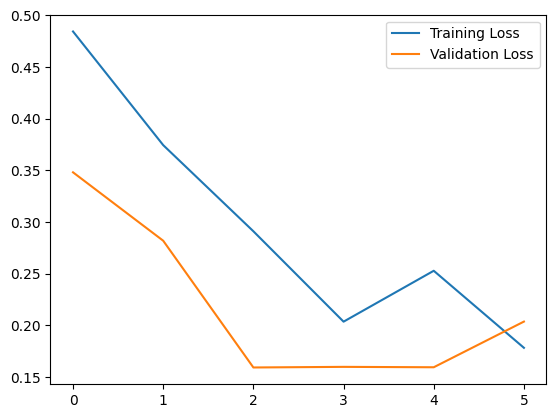

254/254 [==============================] - 18s 69ms/step

		Accuracy Model: 0.9485

Classification Report: 
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      3803
           1       0.96      0.94      0.95      4314

    accuracy                           0.95      8117
   macro avg       0.95      0.95      0.95      8117
weighted avg       0.95      0.95      0.95      8117



In [15]:
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

loss = history.history['loss'] # History of Loss Function
val_loss = history.history['val_loss'] # value of Loss Function

# Show plot Loss - value-loss

plt.plot(loss, label = "Training Loss")
plt.plot(val_loss, label = "Validation Loss")
plt.legend()
plt.show()

# Show accuracy model

predictions = (model.predict(padded_eval_sequence) > 0.5).astype("int32")
accuracy_model = accuracy_score(Y_eval, predictions) 
print(f"\n\t\tAccuracy Model: {accuracy_model:.4f}")

# Show Classification Report

print("\nClassification Report: ")
print(classification_report(Y_eval, predictions))


Save Models And Tokenizer

In [17]:
import pickle

model.save('fake_news_simpleRNN.h5') # Save model

with open('tokenizer_RNN.pkl', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL) # Save tokenizer

with open('history_simpleRNN.pkl', 'wb') as f:
    pickle.dump(history.history, f) # Save history